<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Analyzing IMDb Data

_Author: Kevin Markham (DC)_

---

For project two, you will complete a serious of exercises exploring movie rating data from IMDb.

For these exercises, you will be conducting basic exploratory data analysis on IMDB's movie data, looking to answer such questions as:

What is the average rating per genre?
How many different actors are in a movie?

This process will help you practice your data analysis skills while becoming comfortable with Pandas.

## Basic level

In [198]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.style.use('fivethirtyeight')

import seaborn as sns
sns.set(style="whitegrid", color_codes=True)

#### Read in 'imdb_1000.csv' and store it in a DataFrame named movies.

In [199]:
movies = pd.read_csv('./data/imdb_1000.csv')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


#### Check the number of rows and columns.

In [200]:
# Answer:
movies.shape

(979, 6)

#### Check the data type of each column.

In [8]:
# Answer:
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

#### Calculate the average movie duration.

In [4]:
# Answer:
duration = movies.loc[:, 'duration']
duration.mean()

120.97957099080695

#### Sort the DataFrame by duration to find the shortest and longest movies.

In [5]:
# Answer:
sorted_duration = duration.sort_values()
shortest = sorted_duration.iloc[0]
longest = sorted_duration.iloc[len(sorted_duration)-1]
print ("Shortest {} Logest {}".format(shortest, longest))

Shortest 64 Logest 242


#### Create a histogram of duration, choosing an "appropriate" number of bins.

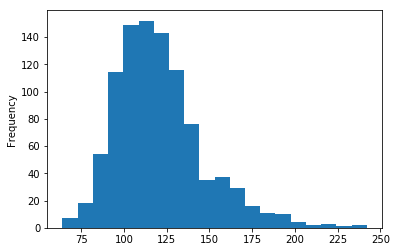

In [10]:
# Answer:
fig, ax = plt.subplots()
duration.plot(kind='hist', ax = ax, bins=20)

#### Use a box plot to display that same data.

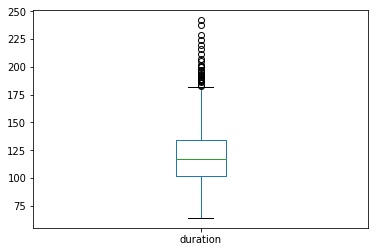

In [12]:
# Answer:
fig, ax = plt.subplots()
duration.plot(kind='box', ax = ax);

## Intermediate level

#### Count how many movies have each of the content ratings.

In [19]:
# Answer:
content_rating = movies.groupby('content_rating').count()
content_rating

,star_rating,title,genre,duration,actors_list
content_rating,,,,,
APPROVED,47,47,47,47,47
G,32,32,32,32,32
GP,3,3,3,3,3
NC-17,7,7,7,7,7
NOT RATED,65,65,65,65,65
PASSED,7,7,7,7,7
PG,123,123,123,123,123
PG-13,189,189,189,189,189
R,460,460,460,460,460


#### Use a visualization to display that same data, including a title and x and y labels.

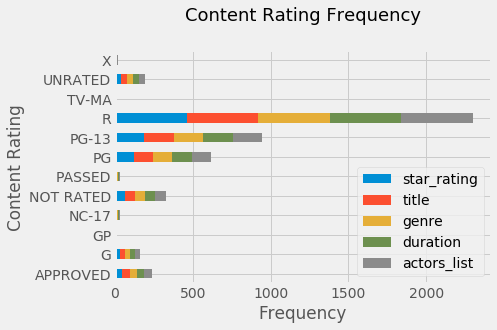

In [29]:
# Answer:
fig, ax = plt.subplots()
content_rating.plot(kind='barh', ax = ax, stacked=True);
ax.set_title('Content Rating Frequency', fontsize=18, y=1.1)
ax.set_xlabel('Frequency');
ax.set_ylabel('Content Rating');

#### Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP.

In [201]:
# Answer:
movies.loc[((movies['content_rating'] == 'NOT RATED')  | 
           (movies['content_rating'] == 'APPROVED') | 
           (movies['content_rating'] == 'PASSED') | 
           (movies['content_rating'] == 'GP')), 'content_rating']  = 'UNRATED'
movies.head()
#movies.content_rating.map(rating_cat).astype("category", categories=set(rating_cat.values()))

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


#### Convert the following content ratings to "NC-17": X, TV-MA.

In [202]:
# Answer:
movies.loc[((movies['content_rating'] == 'X')  | 
           (movies['content_rating'] == 'TV-MA')), 'content_rating']  = 'NC-17'

#### Count the number of missing values in each column.

In [203]:
# Answer:
movies.isna().sum()

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

#### If there are missing values: examine them, then fill them in with "reasonable" values.

In [204]:
# Answer:
movies.loc[:, 'content_rating'].fillna('UNRATED', inplace=True)

#### Calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours.

In [205]:
# Answer:
avg_rating_long_movies = movies[movies.loc[:, 'duration'] >= 120].loc[:,'star_rating'].mean()
avg_rating_short_movies = movies[movies.loc[:, 'duration'] < 120].loc[:,'star_rating'].mean()
print(avg_rating_long_movies, avg_rating_short_movies)

7.948898678414082 7.838666666666657


#### Use a visualization to detect whether there is a relationship between duration and star rating.

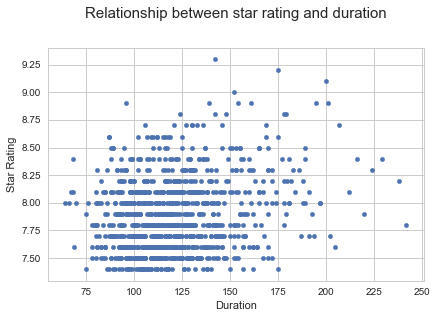

In [206]:
# Answer:
fig, ax = plt.subplots()
movies.plot(kind='scatter', ax = ax, x = 'duration', y = 'star_rating');
ax.set_title('Relationship between star rating and duration', fontsize=15, y=1.1)
ax.set_xlabel('Duration');
ax.set_ylabel('Star Rating');

#### Calculate the average duration for each genre.

In [207]:
# Answer:
movies.groupby('genre').mean()

,star_rating,duration
genre,,
Action,7.884559,126.485294
Adventure,7.933333,134.840000
Animation,7.914516,96.596774
Biography,7.862338,131.844156
Comedy,7.822436,107.602564
Crime,7.916935,122.298387
Drama,7.902518,126.539568
Family,7.850000,107.500000
Fantasy,7.700000,112.000000


## Advanced level

#### Visualize the relationship between content rating and duration.

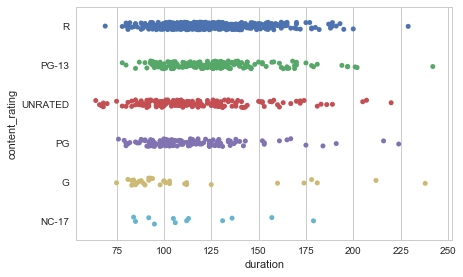

In [208]:
# Answer:
fig, ax = plt.subplots()
#y = int(movies.loc[:, 'content_rating'])
sns.stripplot(x="duration", y="content_rating", data=movies, jitter=True);
#movies.plot(kind='scatter', ax = ax, x = 'duration', y = y);
#ax.set_title('Relationship between content rating and duration', fontsize=15, y=1.1)
#ax.set_xlabel('Duration');
#ax.set_ylabel('Content Rating');

#### Determine the top rated movie (by star rating) for each genre.

In [216]:
# Answer:
movies.groupby('genre').max()

,star_rating,title,content_rating,duration,actors_list
genre,,,,,
Action,9.0,Yojimbo,UNRATED,205,"[u'Ziyi Zhang', u'Takeshi Kaneshiro', u'Andy L..."
Adventure,8.9,True Grit,UNRATED,224,"[u'Yves Montand', u'Charles Vanel', u'Peter va..."
Animation,8.6,Wreck-It Ralph,UNRATED,134,"[u'Y\xf4ji Matsuda', u'Yuriko Ishida', u'Y\xfb..."
Biography,8.9,Walk the Line,UNRATED,202,"[u'Will Smith', u'Thandie Newton', u'Jaden Smi..."
Comedy,8.6,Zombieland,UNRATED,187,"[u'Zooey Deschanel', u'Joseph Gordon-Levitt', ..."
Crime,9.3,Zodiac,UNRATED,229,"[u'Yeong-ae Lee', u'Min-sik Choi', u'Shi-hoo K..."
Drama,8.9,Zulu,UNRATED,242,"[u'William Holden', u'Gloria Swanson', u'Erich..."
Family,7.9,Willy Wonka & the Chocolate Factory,PG,115,"[u'Henry Thomas', u'Drew Barrymore', u'Peter C..."
Fantasy,7.7,The City of Lost Children,R,112,"[u'Ron Perlman', u'Daniel Emilfork', u'Judith ..."


#### Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates.

In [217]:
# Answer:
##Check Duplicate
print(movies[movies.duplicated('title')])
movies.drop_duplicates('title', keep='first', inplace=True)
print(movies[movies.duplicated('title')])

Empty DataFrame
Columns: [star_rating, title, content_rating, genre, duration, actors_list]
Index: []
Empty DataFrame
Columns: [star_rating, title, content_rating, genre, duration, actors_list]
Index: []


#### Calculate the average star rating for each genre, but only include genres with at least 10 movies


#### Option 1: manually create a list of relevant genres, then filter using that list

In [285]:
# Answer:
movies.groupby('genre').count()
genre_list = ['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Drama', 'Horror', 'Mystery']
for g in genre_list:
    print("{}: {}".format(g, movies.groupby('genre').get_group(g)['star_rating'].mean()))

Action: 7.88455882352942
Adventure: 7.940540540540539
Animation: 7.914516129032259
Biography: 7.862337662337664
Comedy: 7.82243589743591
Crime: 7.921311475409841
Drama: 7.902517985611515
Horror: 7.817857142857142
Mystery: 7.975


#### Option 2: automatically create a list of relevant genres by saving the value_counts and then filtering

In [160]:
# Answer
#apply(lambda x: print("{}: {}".format(g, x.get_group(g)['star_rating'].mean())) for g in genre_list)

(array([ 0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  3,  3,
         3,  3,  3,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  6,  6,  6,  6,
         6, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12]),
 array([0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1,
        2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3,
        4]))

#### Option 3: calculate the average star rating for all genres, then filter using a boolean Series

In [301]:
# Answer:
genre_series = movies.groupby('genre')['star_rating'].count() > 10
genre_df = pd.DataFrame({'genre':genre_series.index, 'count_10':genre_series.values})
genre_list = genre_df[genre_df.count_10]['genre'].tolist()
movies[movies.loc[:, 'genre'].isin(genre_list)].groupby('genre')['star_rating'].mean()

genre
Action       7.884559
Adventure    7.940541
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.921311
Drama        7.902518
Horror       7.817857
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 4: aggregate by count and mean, then filter using the count

In [ ]:
# Answer:

## Bonus

#### Figure out something "interesting" using the actors data!

In [249]:
## Find most common 
movies.actors_list

0      [u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt...
1        [u'Marlon Brando', u'Al Pacino', u'James Caan']
2      [u'Al Pacino', u'Robert De Niro', u'Robert Duv...
3      [u'Christian Bale', u'Heath Ledger', u'Aaron E...
4      [u'John Travolta', u'Uma Thurman', u'Samuel L....
5      [u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals...
6      [u'Clint Eastwood', u'Eli Wallach', u'Lee Van ...
7      [u'Elijah Wood', u'Viggo Mortensen', u'Ian McK...
8      [u'Liam Neeson', u'Ralph Fiennes', u'Ben Kings...
9      [u'Brad Pitt', u'Edward Norton', u'Helena Bonh...
10     [u'Elijah Wood', u'Ian McKellen', u'Orlando Bl...
11     [u'Leonardo DiCaprio', u'Joseph Gordon-Levitt'...
12     [u'Mark Hamill', u'Harrison Ford', u'Carrie Fi...
13       [u'Tom Hanks', u'Robin Wright', u'Gary Sinise']
14     [u'Elijah Wood', u'Ian McKellen', u'Viggo Mort...
15     [u'Matthew McConaughey', u'Anne Hathaway', u'J...
16     [u'Jack Nicholson', u'Louise Fletcher', u'Mich...
17     [u'Toshir\xf4 Mifune', u

"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunton']"